# Taylor Swift song analysis
#### In this notebook we will analyze metadata information from Spotify about all of Taylor Swift's albums. The goal is to gain an overview of how Taylor's songs have changed overtime, and identify if there are any key trends or outliers in her songs.
#### Data is retrieved from [kaggle](https://www.kaggle.com/datasets/marcnhwu/taylor-swift-songs-with-audio-features-in-spotify)

In [1]:
## Imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Range1d, HoverTool, Legend
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import show
from bokeh.palettes import Category20b, Spectral, Plasma, Viridis, YlOrRd, PuOr, BuPu, BuGn, brewer, GnBu, PRGn, Inferno256, PuRd, RdPu, PiYG, RdYlGn, YlGnBu
from bokeh.io import reset_output, output_notebook
reset_output()
output_notebook()

Loading BokehJS ...

# Load and preprocess the data

**Load the Taylor Swift song dataset from Kaggle which was downloaded onto my computer as `TaylorSwiftSpotifyCorpus.csv`**

In [2]:
df = pd.read_csv('TaylorSwiftSpotifyCorpus.csv', index_col=0)
df

,artist,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
1,Taylor Swift,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,4
2,Taylor Swift,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011,4
3,Taylor Swift,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964,4
4,Taylor Swift,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,4
5,Taylor Swift,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Taylor Swift,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),2021-04-09,277591,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,4
262,Taylor Swift,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),2021-04-09,244236,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,4
263,Taylor Swift,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),2021-04-09,189495,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,4
264,Taylor Swift,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),2021-04-09,208608,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,4


### We decide to only analyze songs from Taylor's main studio albums on Spotify, so we reduce the dataset to those 166 songs.
**We keep the following albums:**
1. Taylor Swift
2. Fearless (Taylor's Version) - we choose use this rather than Fearless Platinum Edition since this is the album Taylor re-recorded so that she can own her own masters. 
3. Speak Now (Deluxe Edition)
4. Red (Deluxe Edition) - the dataset does not contain Taylor's Version so we use the original one here.
5. 1989 (Deluxe Edition)
6. reputation
7. Lover
8. folklore
9. evermore (deluxe version)

### Additional processing:
1. **We will strip away the (Taylor's Version) and (Deluxe Edition)s from the album titles to make all ensuing graphs easier to read.**
2. **We will strip (Taylor’s Version) (From The Vault) from the songs on the Fearless album to be more concise.**



In [3]:
# show the albums and number of songs on each
df.album.value_counts()

Fearless (Taylor's Version)                                                            26
Red (Deluxe Edition)                                                                   22
Speak Now (Deluxe Edition)                                                             20
Lover                                                                                  19
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    19
Fearless Platinum Edition                                                              18
evermore (deluxe version)                                                              17
Speak Now World Tour Live                                                              16
1989 (Deluxe Edition)                                                                  16
folklore                                                                               16
Taylor Swift                                                                           15
reputation

In [4]:
# filter the df for only the albums we want
albums_to_keep = ["Taylor Swift", "Fearless (Taylor's Version)", "Speak Now (Deluxe Edition)","Red (Deluxe Edition)",
                  "1989 (Deluxe Edition)", "reputation", "Lover", "folklore", "evermore (deluxe version)"]

df = df[df['album'].isin(albums_to_keep)]
df

,artist,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
1,Taylor Swift,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,4
2,Taylor Swift,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011,4
3,Taylor Swift,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964,4
4,Taylor Swift,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,4
5,Taylor Swift,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Taylor Swift,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),2021-04-09,277591,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,4
262,Taylor Swift,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),2021-04-09,244236,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,4
263,Taylor Swift,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),2021-04-09,189495,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,4
264,Taylor Swift,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),2021-04-09,208608,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,4


In [5]:
# strip the suffixes from the album names
df['album'][df['album']=="Fearless (Taylor's Version)"] = 'Fearless'
df['album'][df['album']=="Red (Deluxe Edition)"] = 'Red'
df['album'][df['album']=="Speak Now (Deluxe Edition)"] = 'Speak Now'
df['album'][df['album']=="evermore (deluxe version)"] = 'evermore'
df['album'][df['album']=="1989 (Deluxe Edition)"] = '1989'

df

,artist,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
1,Taylor Swift,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,4
2,Taylor Swift,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011,4
3,Taylor Swift,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964,4
4,Taylor Swift,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,4
5,Taylor Swift,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Taylor Swift,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless,2021-04-09,277591,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,4
262,Taylor Swift,We Were Happy (Taylor’s Version) (From The Vault),Fearless,2021-04-09,244236,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,4
263,Taylor Swift,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless,2021-04-09,189495,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,4
264,Taylor Swift,Don’t You (Taylor’s Version) (From The Vault),Fearless,2021-04-09,208608,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,4


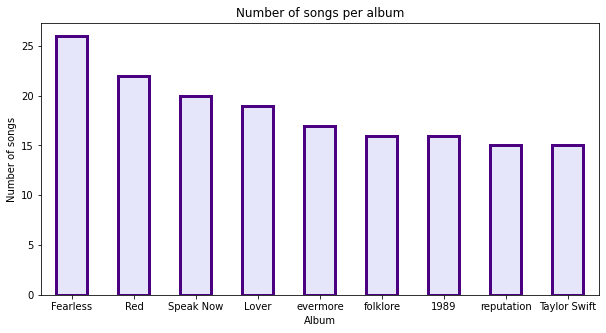

In [6]:
# show the amount of songs per album
ax = df.album.value_counts().plot(kind='bar', color='lavender', edgecolor='indigo', linewidth=3,
                             title="Number of songs per album", xlabel="Album", ylabel="Number of songs",
                             figsize=(10,5),rot=0)
plt.show()

In [7]:
# strip the suffixes from song names
df['name'] = df['name'].str.replace(" \(Taylor’s Version\) \(From The Vault\)","") # /(From The Vault/)", "")

df.name

<ipython-input-7-3ab5a42c969e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace(" \(Taylor’s Version\) \(From The Vault\)","") # /(From The Vault/)", "")


1                      Picture To Burn
2                             Our Song
3                    Should've Said No
4                           Tim McGraw
5                A Place in this World
                    ...               
261                 Mr. Perfectly Fine
262                      We Were Happy
263    That’s When (feat. Keith Urban)
264                          Don’t You
265                       Bye Bye Baby
Name: name, Length: 166, dtype: object

**We can drop the artist and time_signature columns since they are not useful to us.**

In [8]:
# drop the 2 unneeded columns
df = df.drop(['artist', 'time_signature'], axis=1)
df

,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
1,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011
3,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964
4,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
5,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Mr. Perfectly Fine,Fearless,2021-04-09,277591,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
262,We Were Happy,Fearless,2021-04-09,244236,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
263,That’s When (feat. Keith Urban),Fearless,2021-04-09,189495,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
264,Don’t You,Fearless,2021-04-09,208608,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


In [9]:
df.dtypes

name                 object
album                object
release_date         object
length                int64
popularity            int64
danceability        float64
acousticness        float64
danceability.1      float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

**Clean the release_date column to be a date, and update length to be in seconds rather than milliseconds then round to the nearest second value.**

In [10]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["length"] = df["length"]/1000
df["length"] = df["length"].round().astype(int)
df

,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
1,Picture To Burn,Taylor Swift,2006-10-24,173,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,Our Song,Taylor Swift,2006-10-24,201,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011
3,Should've Said No,Taylor Swift,2006-10-24,242,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964
4,Tim McGraw,Taylor Swift,2006-10-24,232,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
5,A Place in this World,Taylor Swift,2006-10-24,199,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Mr. Perfectly Fine,Fearless,2021-04-09,278,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
262,We Were Happy,Fearless,2021-04-09,244,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
263,That’s When (feat. Keith Urban),Fearless,2021-04-09,189,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
264,Don’t You,Fearless,2021-04-09,209,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


**The column `danceability.1` has a typo so we will change it.**

In [11]:
# rename the misspelled column
df = df.rename(columns={"danceability.1": "danceability"})
df

,name,album,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
1,Picture To Burn,Taylor Swift,2006-10-24,173,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,Our Song,Taylor Swift,2006-10-24,201,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011
3,Should've Said No,Taylor Swift,2006-10-24,242,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964
4,Tim McGraw,Taylor Swift,2006-10-24,232,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
5,A Place in this World,Taylor Swift,2006-10-24,199,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Mr. Perfectly Fine,Fearless,2021-04-09,278,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
262,We Were Happy,Fearless,2021-04-09,244,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
263,That’s When (feat. Keith Urban),Fearless,2021-04-09,189,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
264,Don’t You,Fearless,2021-04-09,209,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


## Data exploration

Now that the dataset has been processed, we can make some initial graphs to understand what the dataset looks like.

<AxesSubplot:>

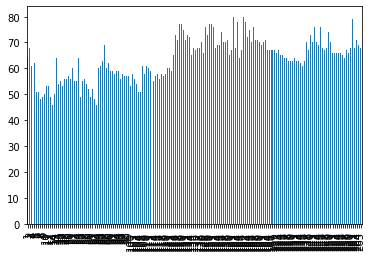

In [14]:
df.popularity.plot(kind='bar')

trending to see how things have changed over time

scatter plot matrix

corr heatmaps

graphs to show top X popular, danceable, etc songs overall and per each album

how do different albums compare to each other
